<a href="https://colab.research.google.com/github/meliy-meyada/Tensorflow-Deep-Learning-and-Artificial-Intelligence/blob/main/TF2_0_Autoregressive_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install Tensorflow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.2


In [2]:
# Additional imports

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


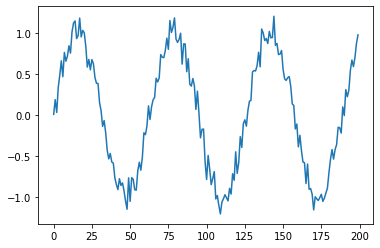

In [3]:
# Make the original data
series = np.sin(0.1*np.arange(200))+ np.random.randn(200)*0.1

# Plot it
plt.plot(series)
plt.show()

In [4]:
# Build tha dataset

T = 10
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)
  
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape ", X.shape, "Y.shape ", Y.shape)

X.shape  (190, 10) Y.shape  (190,)


In [5]:
# Autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)

model.compile(
    loss='mse',
    optimizer=Adam(learning_rate=0.1),
)

# Train the RNN
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
3/3 [==============================] - 1s 88ms/step - loss: 0.6689 - val_loss: 0.4696
Epoch 2/80
3/3 [==============================] - 0s 17ms/step - loss: 0.5378 - val_loss: 0.2222
Epoch 3/80
3/3 [==============================] - 0s 17ms/step - loss: 0.1682 - val_loss: 0.1634
Epoch 4/80
3/3 [==============================] - 0s 17ms/step - loss: 0.2353 - val_loss: 0.1052
Epoch 5/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0848 - val_loss: 0.0736
Epoch 6/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0982 - val_loss: 0.1129
Epoch 7/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0912 - val_loss: 0.0355
Epoch 8/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0527 - val_loss: 0.1086
Epoch 9/80
3/3 [==============================] - 0s 16ms/step - loss: 0.0847 - val_loss: 0.0590
Epoch 10/80
3/3 [==============================] - 0s 17ms/step - loss: 0.0540 - val_loss: 0.0477
Epoch 11/80
3/3 [============

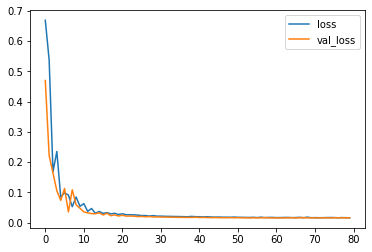

In [6]:
# Plot loss per iteration

import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [7]:
# 'Wrong' forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
  i += 1

  # Update the predictions list
  validation_predictions.append(p)

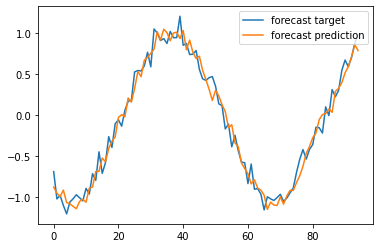

In [8]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [9]:
# Forecast future values 
validation_target = Y[-N//2:]
validation_predictions = []

# Last train input
last_x = X[-N//2]  # 1-D array of lenght T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar

  # Update the predictions list
  validation_predictions.append(p)

  # Make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

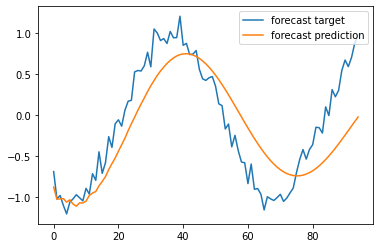

In [10]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()